In [2]:

import numpy as np

# Assuming your matrix is stored in a variable named 'matrix'
# Assuming your weighted vector is stored in a variable named 'weights'
# Replace these with your actual matrix and weighted vector

# Example matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Example weighted vector
weights = np.array([0.5, 0.3, 0.2])

# Calculate the weighted sum of outer products for each row
result_matrix = np.sum(weights[:, np.newaxis, np.newaxis] * np.outer(matrix, matrix), axis=0)
print(np.outer(matrix, matrix))
print("Result Matrix:")
print(result_matrix)

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]
Result Matrix:
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 2.  4.  6.  8. 10. 12. 14. 16. 18.]
 [ 3.  6.  9. 12. 15. 18. 21. 24. 27.]
 [ 4.  8. 12. 16. 20. 24. 28. 32. 36.]
 [ 5. 10. 15. 20. 25. 30. 35. 40. 45.]
 [ 6. 12. 18. 24. 30. 36. 42. 48. 54.]
 [ 7. 14. 21. 28. 35. 42. 49. 56. 63.]
 [ 8. 16. 24. 32. 40. 48. 56. 64. 72.]
 [ 9. 18. 27. 36. 45. 54. 63. 72. 81.]]


In [4]:
import numpy as np

# Assuming your matrix is stored in a variable named 'matrix'
# Replace this with your actual matrix

# Example matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Calculate outer products for each row and sum them up without using a loop
result_matrix = np.einsum('ij,ik->ijk', matrix, matrix)

weights = np.array([0.5, 0.3, 0.2])

# Calculate the weighted sum of outer products for each row
result_matrix = np.sum(weights[:, np.newaxis, np.newaxis] * result_matrix, axis=0)

print("Result Matrix:")
print(result_matrix)

Result Matrix:
[[15.1 18.2 21.3]
 [18.2 22.3 26.4]
 [21.3 26.4 31.5]]


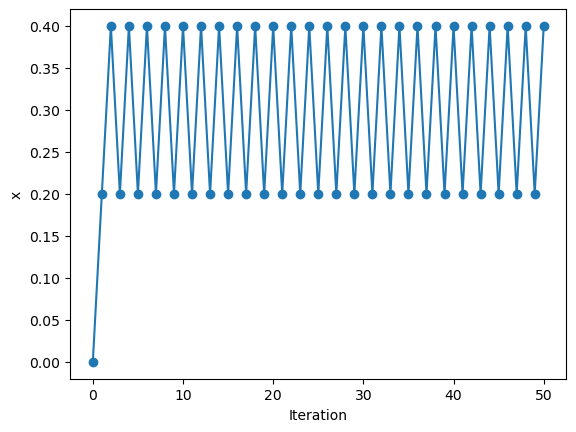

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def subgradient(x):
    if x < 1/3:
        return -2.0
    elif x > 1/3:
        return 2.0
    else:
        # Any value in the interval [-2, 2] is a subgradient at x = 1/3
        return np.random.uniform(-2, 2)

def subgradient_descent(x0, r, num_iterations):
    x_values = [x0]
    for i in range(1, num_iterations + 1):
        step_size = 10**r
        x_next = x_values[-1] - step_size * subgradient(x_values[-1])
        x_values.append(x_next)
    return x_values

# Set the parameters
x0 = 0
r = -1  # You can choose different values for r
num_iterations = 50

# Run subgradient descent
x_values = subgradient_descent(x0, r, num_iterations)

# Plot the results
plt.plot(range(num_iterations + 1), x_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('x')
# plt.title(f'Subgradient Descent: $f(x) = 2|\\frac{1}{3} - x|$ with $r={r}$')
plt.show()

In [1]:
######
######  This script compares different optimization methods on optimizating
######  a quadratic function of the form f(x) = 1/2 * x'Hx + x'b
######

import numpy as np
import hw4_functions as hw4
import algorithms as alg


# the hessian matrix of the quadratic function
H = np.matrix('1 0; 0 30')

# the vector of linear coefficient of the quadratic function
b = np.matrix('0; 0')

# Choose the quadratic objective. This notation defines a "closure", returning
# an oracle function which takes x (and order) as its only parameter, and calls
# obj.quadratic with parameters H and b defined above, and the parameters of
# the closure (x and order)
func = lambda x, order: hw4.quadratic( H, b, x, order )


# Start at (4,0.3), with (for BFGS) an identity inverse Hessian
initial_x = np.matrix('4; 0.3')
initial_inverse_hessian = np.eye( 2 )
# Find the (1e-4)-suboptimal solution
eps = 1e-4

maximum_iterations = 65536

# Run the algorithms
x, values, runtimes, gd_xs = alg.gradient_descent( func, initial_x, eps, maximum_iterations, alg.bisection )

x, values, runtimes, cg_xs = alg.cg( func, initial_x, eps, maximum_iterations, alg.bisection )

x, values, runtimes, bfgs_xs = alg.bfgs( func, initial_x, initial_inverse_hessian, eps, maximum_iterations, alg.bisection )

x, values, runtimes, newton_xs = alg.newton( func, initial_x, eps, maximum_iterations, alg.bisection )

# Draw contour plots
hw4.draw_contour_new( func, gd_xs, cg_xs, bfgs_xs, newton_xs, levels=np.arange(5, 400, 20), x=np.arange(-5, 5.1, 0.1), y=np.arange(-5, 5.1, 0.1) )
